## Day 3 Homework -- Analysis in python

1. import plotnine as p9, scipy stats, pandas as pd, and numpy as np 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotnine as p9
from scipy import stats

You can get the "Iris" dataset <https://en.wikipedia.org/wiki/Iris_flower_data_set> from the `day3/data` directory. 
- Load it into pandas as we did the TB dataset previously. 
- Show the top 5 lines of the dataset.

In [2]:
irisraw=pd.read_csv('/home/fzhong3/bcmb_bootcamp/day3/data/iris.csv')

In [3]:
irisraw.sort_values(by=['sepal.length','sepal.width'],ascending=False).head()

,sepal.length,sepal.width,petal.length,petal.width,variety
131,7.9,3.8,6.4,2.0,Virginica
117,7.7,3.8,6.7,2.2,Virginica
135,7.7,3.0,6.1,2.3,Virginica
122,7.7,2.8,6.7,2.0,Virginica
118,7.7,2.6,6.9,2.3,Virginica


In [4]:
irisraw.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


2. Plot the petal length of each species as a boxplot and a dotplot

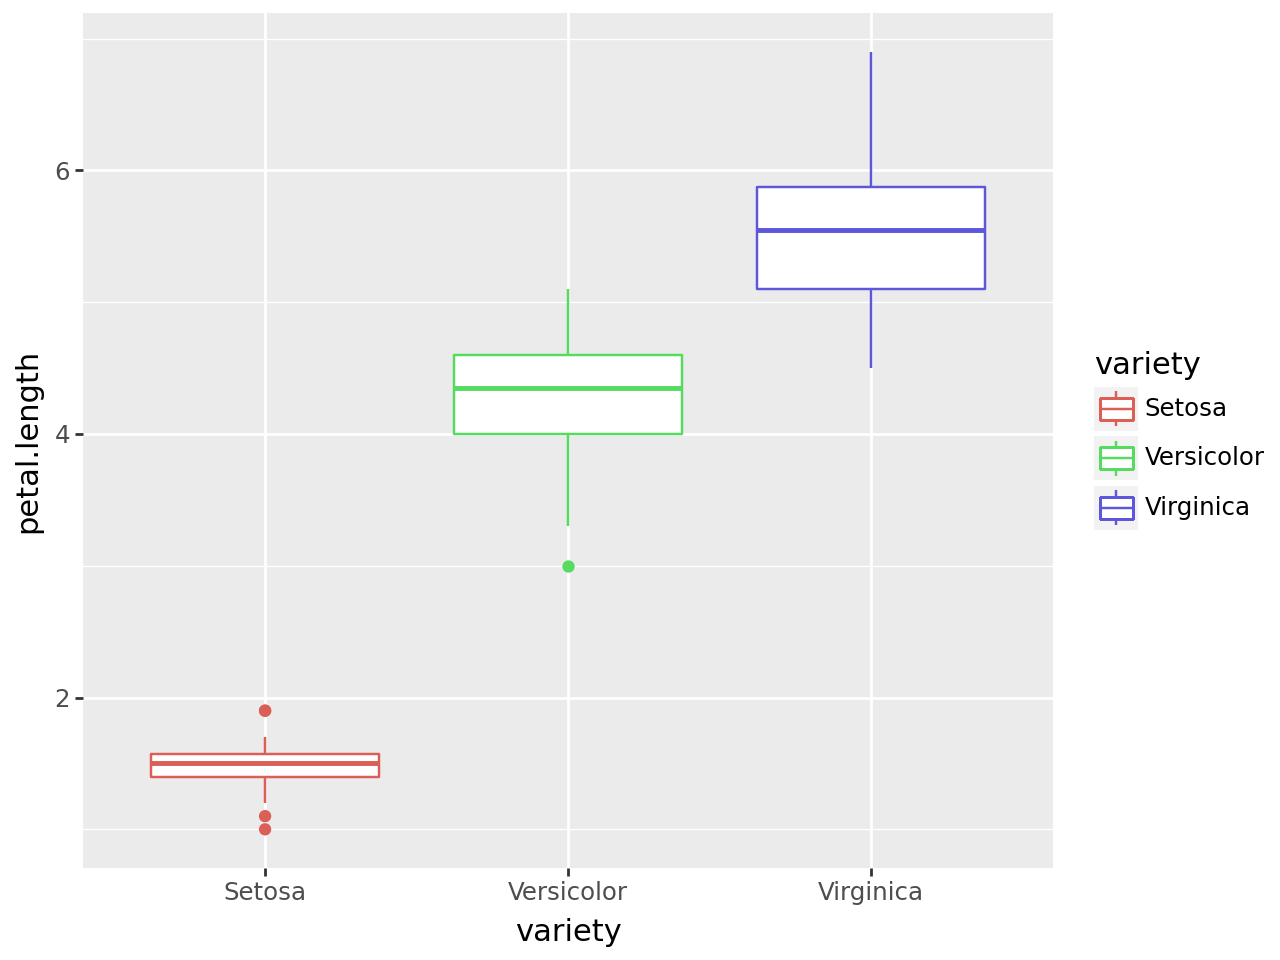

In [5]:
p9.ggplot(data=irisraw,mapping=p9.aes(x='variety', y='petal.length', color='variety'))+p9.geom_boxplot()

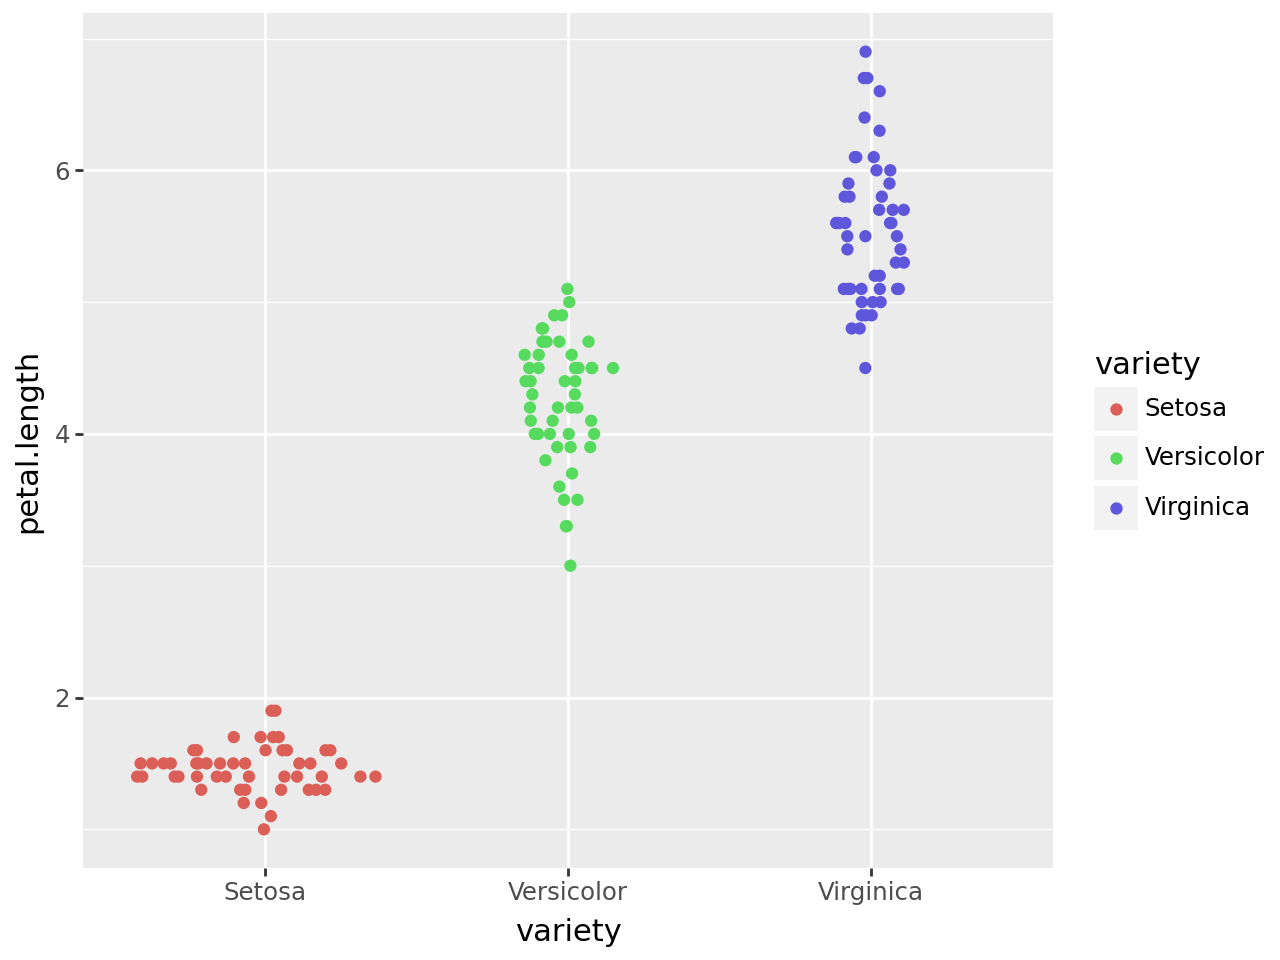

In [6]:
p9.ggplot(data=irisraw,mapping=p9.aes(x='variety', y='petal.length', color='variety'))+p9.geom_sina()

3. Is there a statistically significant difference in petal length between setosa and versicolor, what about versicolor and virginica?

In [7]:
print(stats.ttest_ind(irisraw[irisraw['variety']=='Setosa']['petal.length'], irisraw[irisraw['variety']=='Versicolor']['petal.length']))

TtestResult(statistic=np.float64(-39.492719391538095), pvalue=np.float64(5.404910513441677e-62), df=np.float64(98.0))


In [8]:
print(stats.ttest_ind(irisraw[irisraw['variety']=='Setosa']['petal.length'], irisraw[irisraw['variety']=='Virginica']['petal.length']))

TtestResult(statistic=np.float64(-49.98618625709594), pvalue=np.float64(1.5048006992427275e-71), df=np.float64(98.0))


There is a statistically significant difference in petal length between setosa and versicolor (p-value = 5.4e-62 < 0.05), and there is a statistically significant difference in pental length between versicolor and virginica (p-value = 1.5e-71 < 0.05).

4. Generate all possible combinations of scatter plots (i.e. all variables versus each other) colored by variety.

/tmp/ipykernel_2409542/1782478354.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


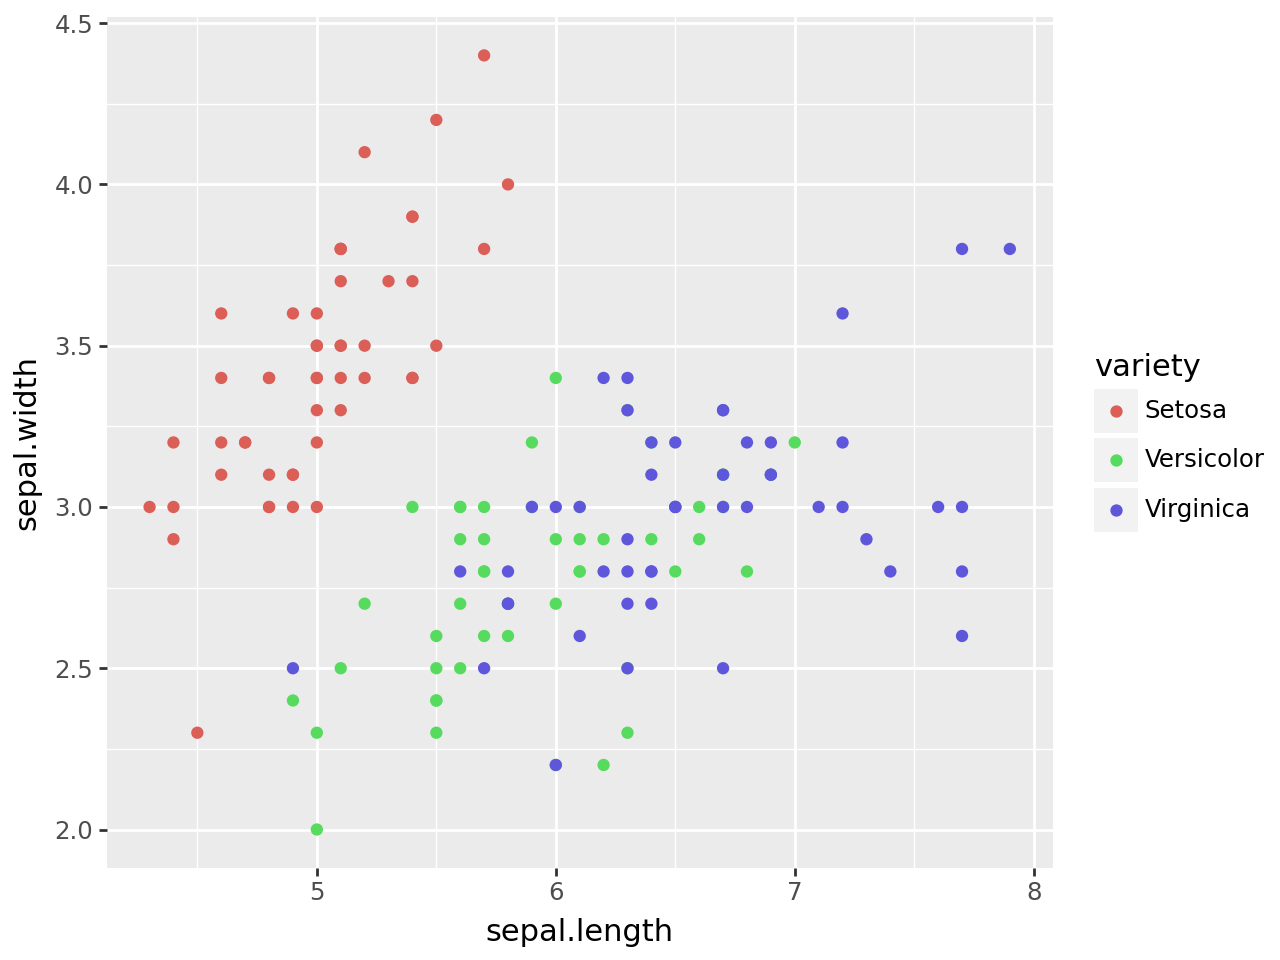

/tmp/ipykernel_2409542/1782478354.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


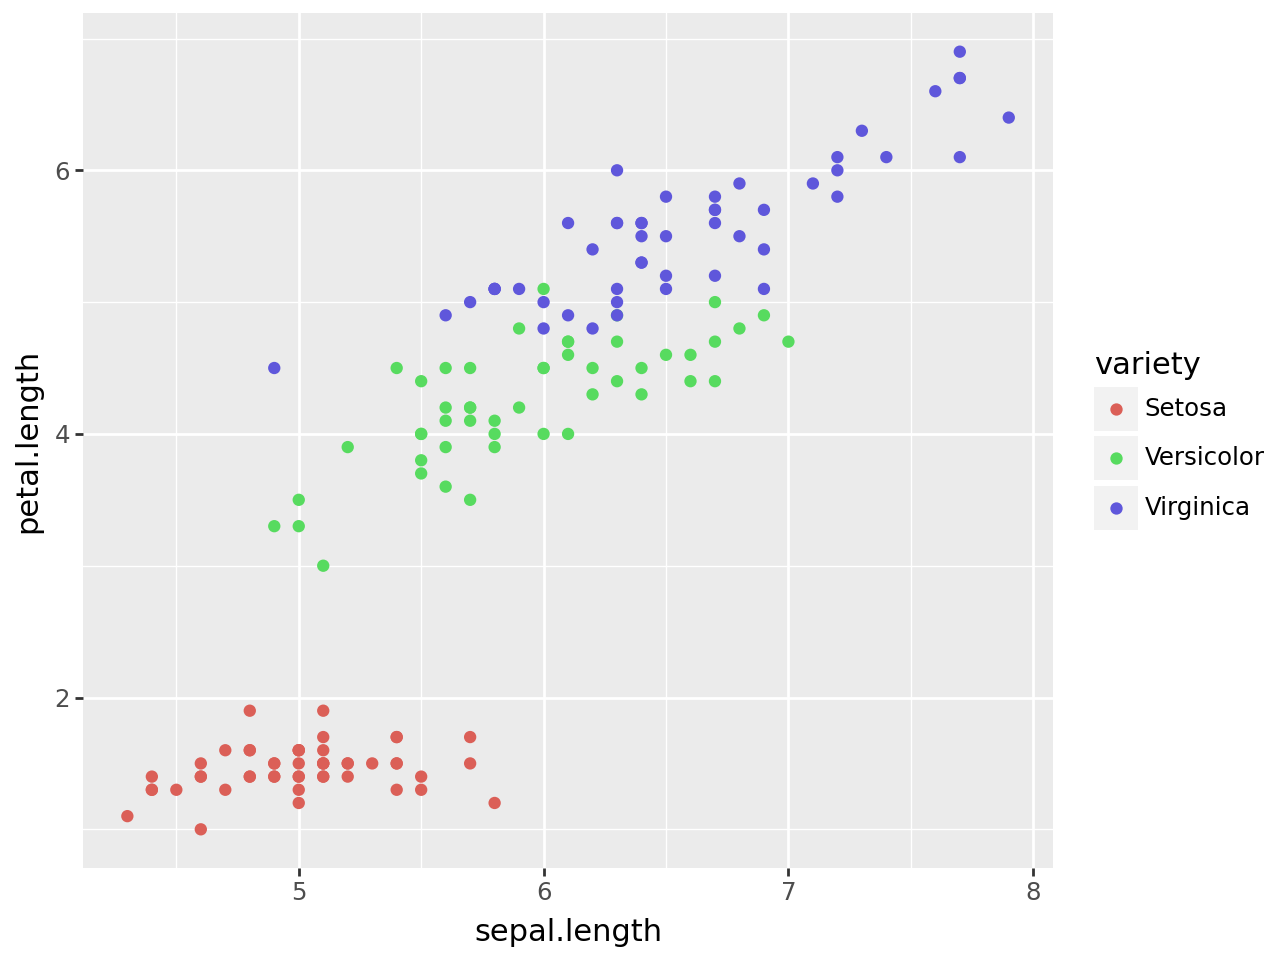

/tmp/ipykernel_2409542/1782478354.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


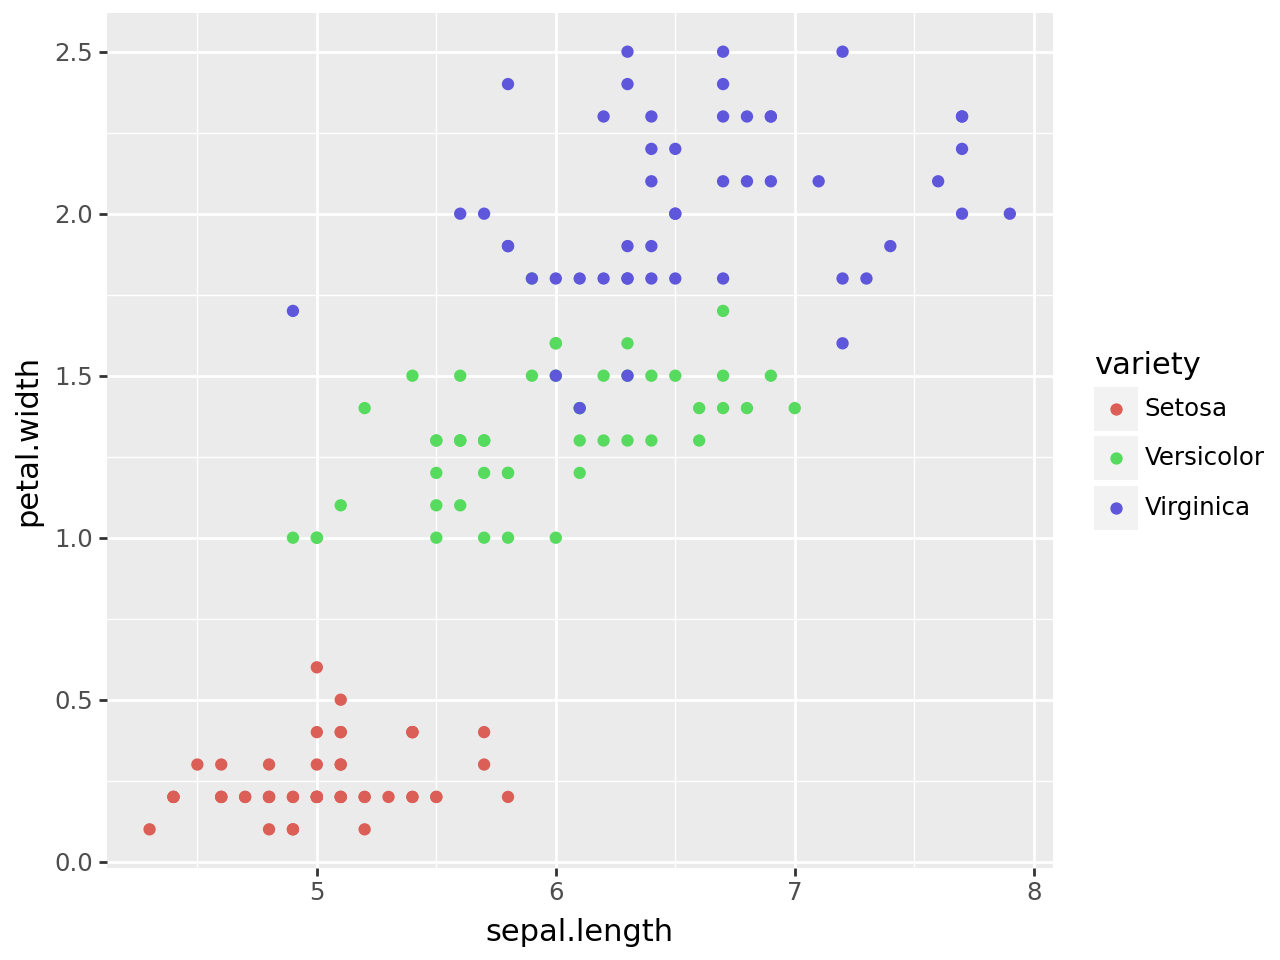

/tmp/ipykernel_2409542/1782478354.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


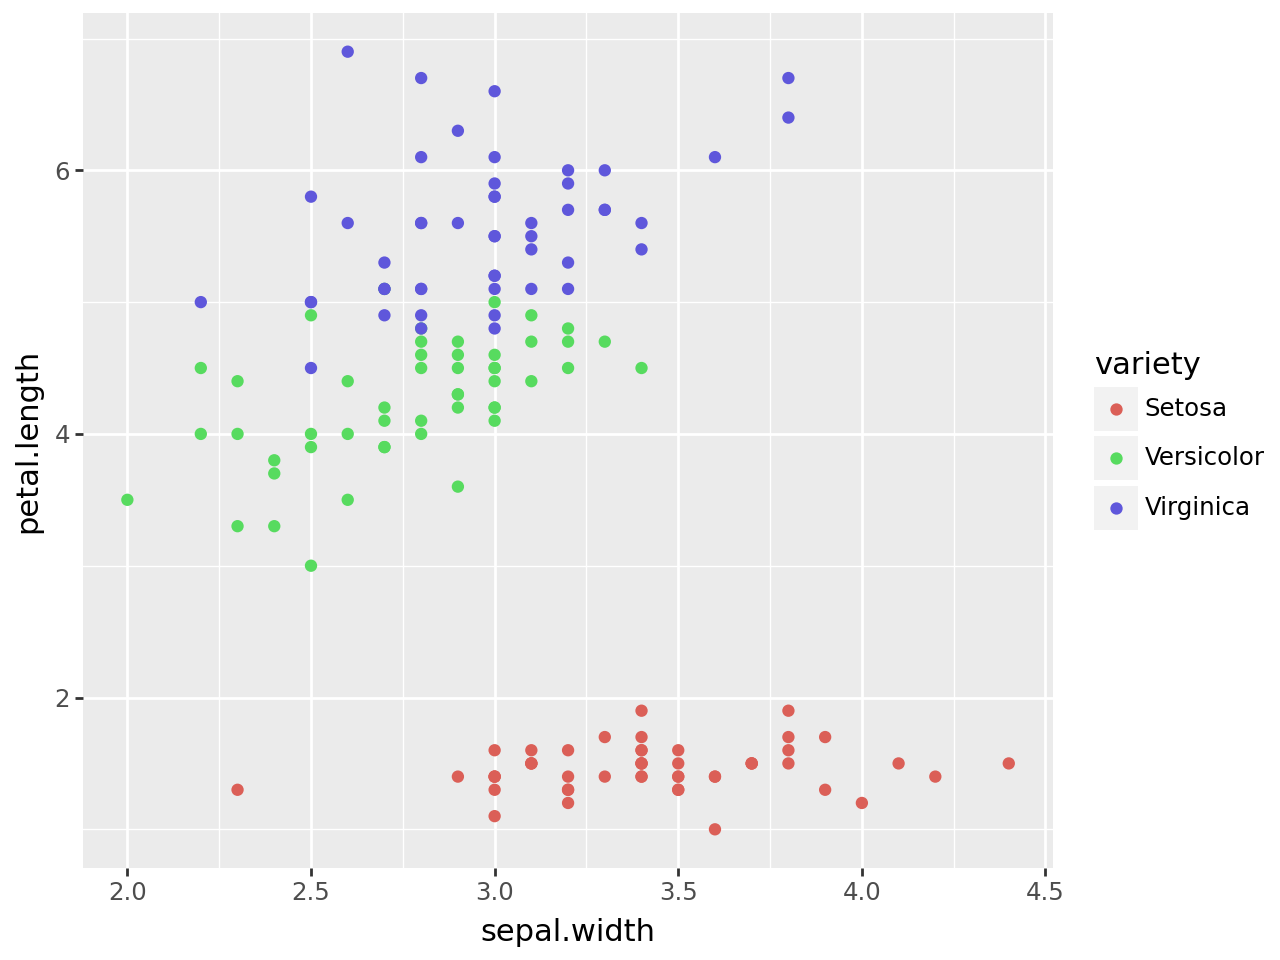

/tmp/ipykernel_2409542/1782478354.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


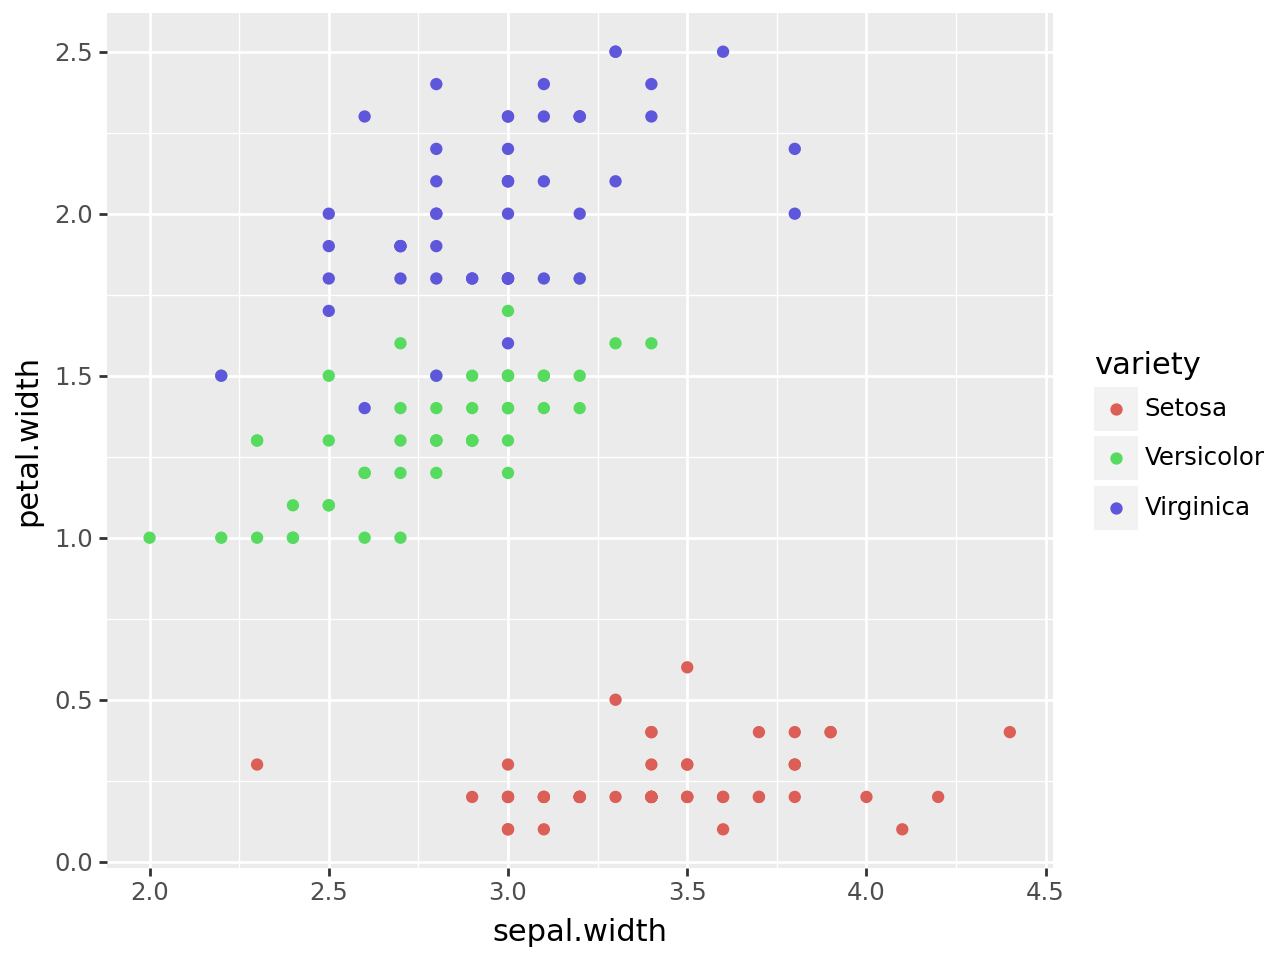

/tmp/ipykernel_2409542/1782478354.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


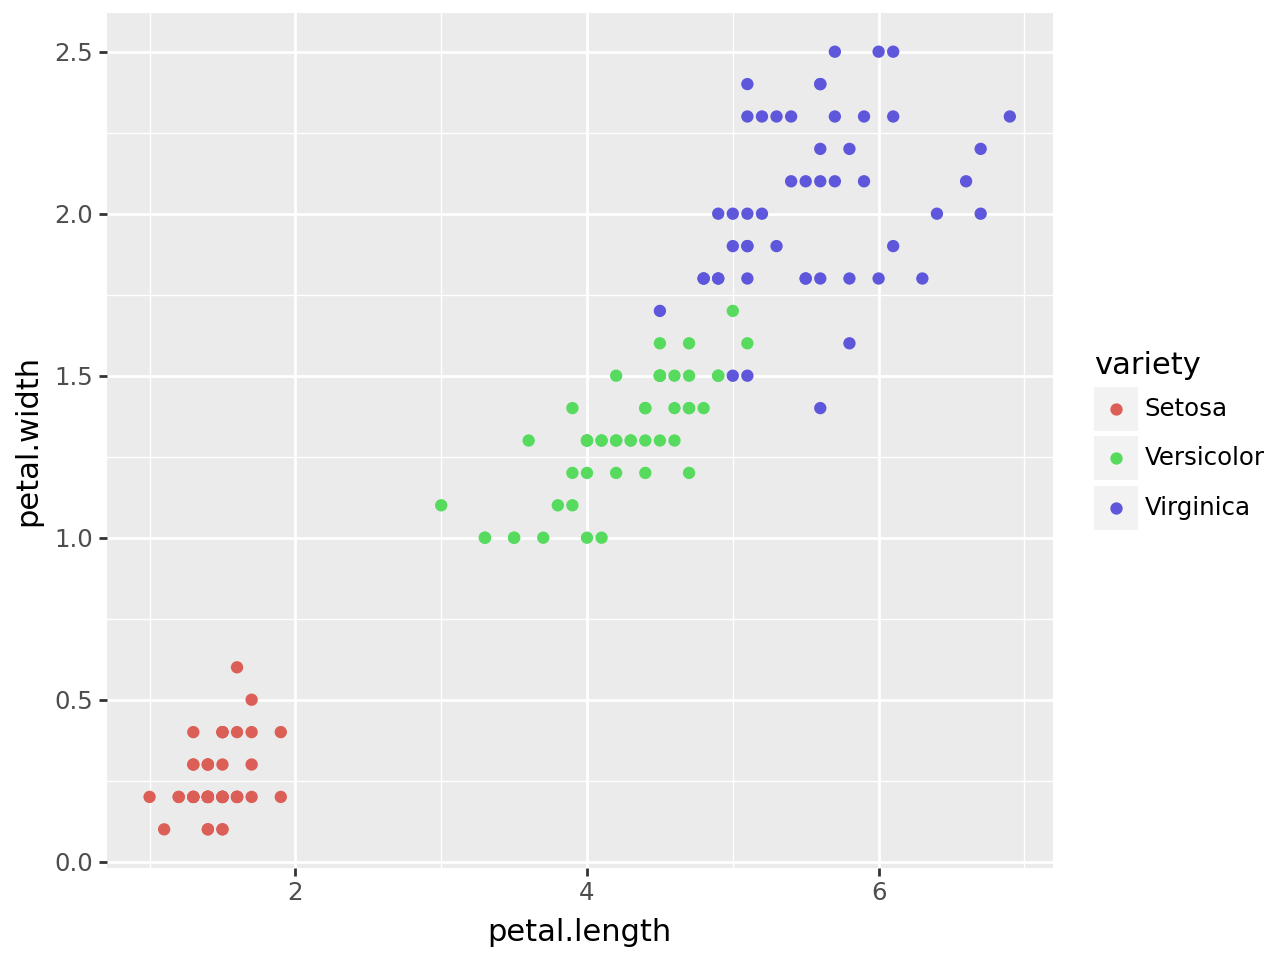

In [9]:
for i in range(0, len(irisraw.columns)-2):
    for j in range(i+1, len(irisraw.columns)-1):
        #print(irisraw.columns[i],irisraw.columns[j])
        print(p9.ggplot(data=irisraw,mapping=p9.aes(x=irisraw.columns[i], y=irisraw.columns[j], color='variety'))+p9.geom_point())

5. Write a for loop to test if each flower measurement is a normal distribution. If the distribution is normal print the p-value, if the distribution is not normal print "Distribution not normal!" (hint scipy has a normaltest function https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

In [10]:
flowerlist=['petal.length','petal.width', 'sepal.length', 'sepal.width']
print(flowerlist)

['petal.length', 'petal.width', 'sepal.length', 'sepal.width']


In [11]:
for i in flowerlist:
    array=np.array(irisraw[i])
    x=stats.normaltest(array)
    check=x.pvalue
    if (check > .05):
        print('Distribution is not normal')
    else:
        print(check)

7.264667501338673e-49
1.3492785927137586e-30
Distribution is not normal
Distribution is not normal


6. Generate a correlation matrix between the iris variables, plot it as a heatmap with the axes labelled (Hint pandas has a correlation function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) Does the plot look different when you change the correlation method?

In [34]:
mycorr = irisraw.select_dtypes('number')
mycorr

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
import seaborn as sn

df=irisraw[flowerlist].corr()
df

,petal.length,petal.width,sepal.length,sepal.width
petal.length,1.000000,0.962865,0.871754,-0.428440
petal.width,0.962865,1.000000,0.817941,-0.366126
sepal.length,0.871754,0.817941,1.000000,-0.117570
sepal.width,-0.428440,-0.366126,-0.117570,1.000000


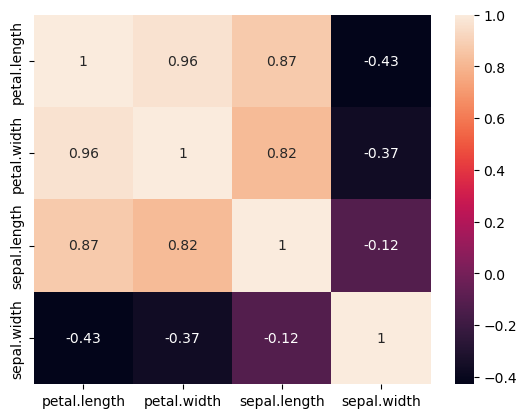

In [13]:
sn.heatmap(df, annot=True)
plt.show()

In [14]:
versi=irisraw[irisraw['variety']=="Versicolor"]
versidf=versi[flowerlist].corr()
versidf

,petal.length,petal.width,sepal.length,sepal.width
petal.length,1.000000,0.786668,0.754049,0.560522
petal.width,0.786668,1.000000,0.546461,0.663999
sepal.length,0.754049,0.546461,1.000000,0.525911
sepal.width,0.560522,0.663999,0.525911,1.000000


Versicolor


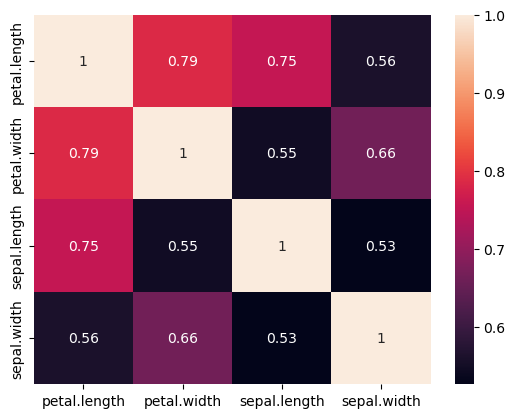

In [15]:
sn.heatmap(versidf, annot=True)
print('Versicolor')
plt.show()

In [16]:
setosa=irisraw[irisraw['variety']=="Setosa"]
setosadf=setosa[flowerlist].corr()
setosadf

,petal.length,petal.width,sepal.length,sepal.width
petal.length,1.000000,0.331630,0.267176,0.177700
petal.width,0.331630,1.000000,0.278098,0.232752
sepal.length,0.267176,0.278098,1.000000,0.742547
sepal.width,0.177700,0.232752,0.742547,1.000000


Setosa


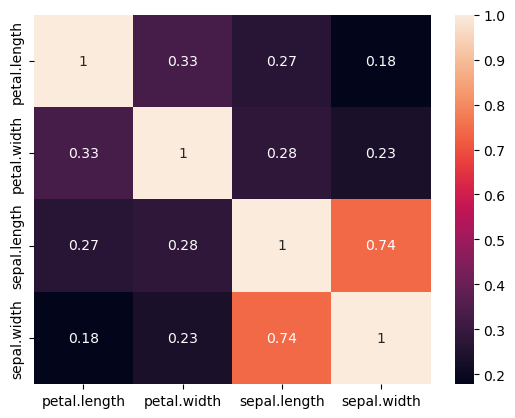

In [17]:
sn.heatmap(setosadf, annot=True)
print('Setosa')
plt.show()

In [18]:
virginica=irisraw[irisraw['variety']=="Virginica"]
virginicadf=virginica[flowerlist].corr()
virginicadf

,petal.length,petal.width,sepal.length,sepal.width
petal.length,1.000000,0.322108,0.864225,0.401045
petal.width,0.322108,1.000000,0.281108,0.537728
sepal.length,0.864225,0.281108,1.000000,0.457228
sepal.width,0.401045,0.537728,0.457228,1.000000


Virginica


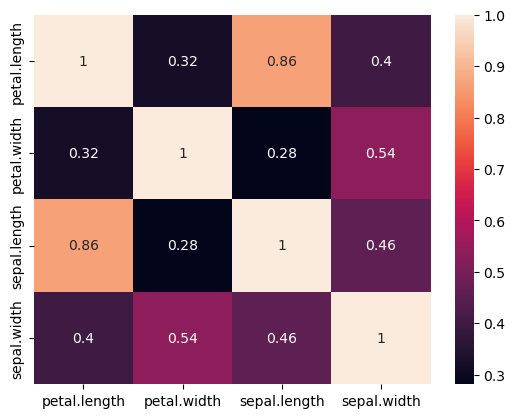

In [19]:
sn.heatmap(virginicadf, annot=True)
print('Virginica')
plt.show()

In [20]:
irisraw['variety'].unique().tolist()

['Setosa', 'Versicolor', 'Virginica']

Setosa


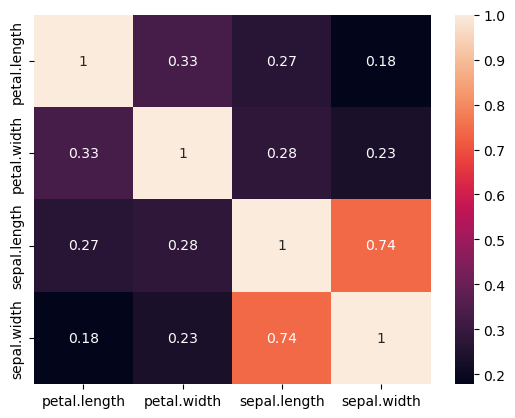

Versicolor


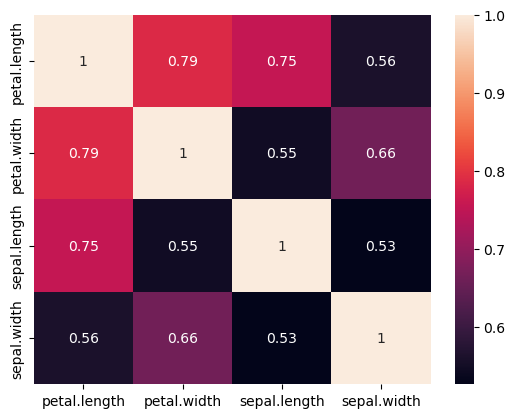

Virginica


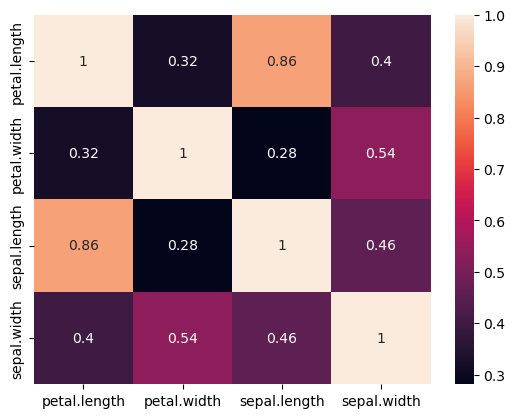

In [21]:
for i in irisraw['variety'].unique().tolist():
    print(i)
    tempcorr=irisraw[irisraw['variety']==i][flowerlist].corr()
    sn.heatmap(tempcorr, annot=True)
    plt.show()

In [22]:
mydf=irisraw[['sepal.length', 'sepal.width','petal.length','petal.width']].corr()

In [23]:
mydf

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [24]:
mydf['myidx']=mydf.index

In [25]:
mydf

,sepal.length,sepal.width,petal.length,petal.width,myidx
sepal.length,1.000000,-0.117570,0.871754,0.817941,sepal.length
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,sepal.width
petal.length,0.871754,-0.428440,1.000000,0.962865,petal.length
petal.width,0.817941,-0.366126,0.962865,1.000000,petal.width


In [26]:
melty=mydf.melt(id_vars='myidx')

In [27]:
melty

,myidx,variable,value
0,sepal.length,sepal.length,1.000000
1,sepal.width,sepal.length,-0.117570
2,petal.length,sepal.length,0.871754
3,petal.width,sepal.length,0.817941
4,sepal.length,sepal.width,-0.117570
5,sepal.width,sepal.width,1.000000
6,petal.length,sepal.width,-0.428440
7,petal.width,sepal.width,-0.366126
8,sepal.length,petal.length,0.871754
9,sepal.width,petal.length,-0.428440


/tmp/ipykernel_2409542/146286069.py:1: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


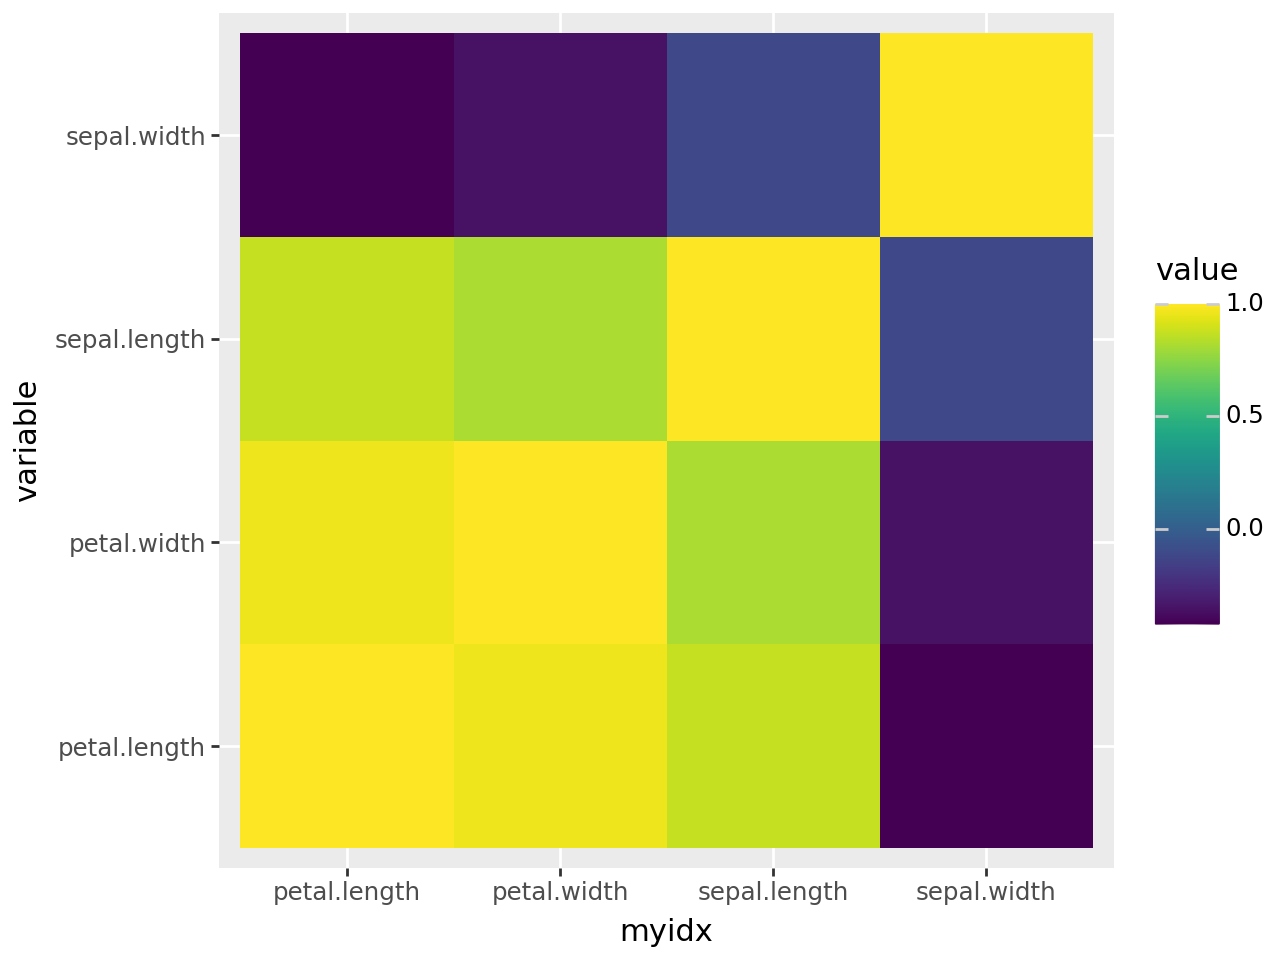

In [28]:
print(p9.ggplot(data=melty, mapping=p9.aes(x='myidx', y='variable', fill='value'))+p9.geom_tile())

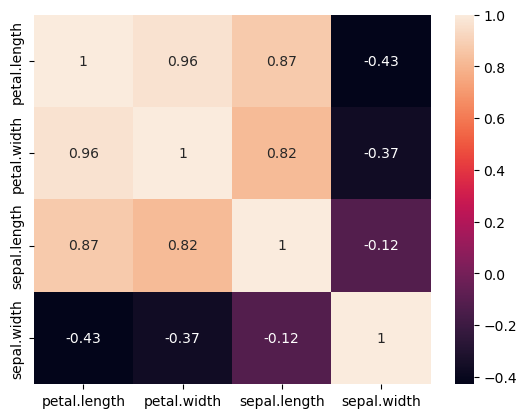

In [33]:
sn.heatmap(df, annot=True)
plt.show()

7. Repeat 4, but with linear fits to each scatter plot.

/tmp/ipykernel_2409542/1860689304.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


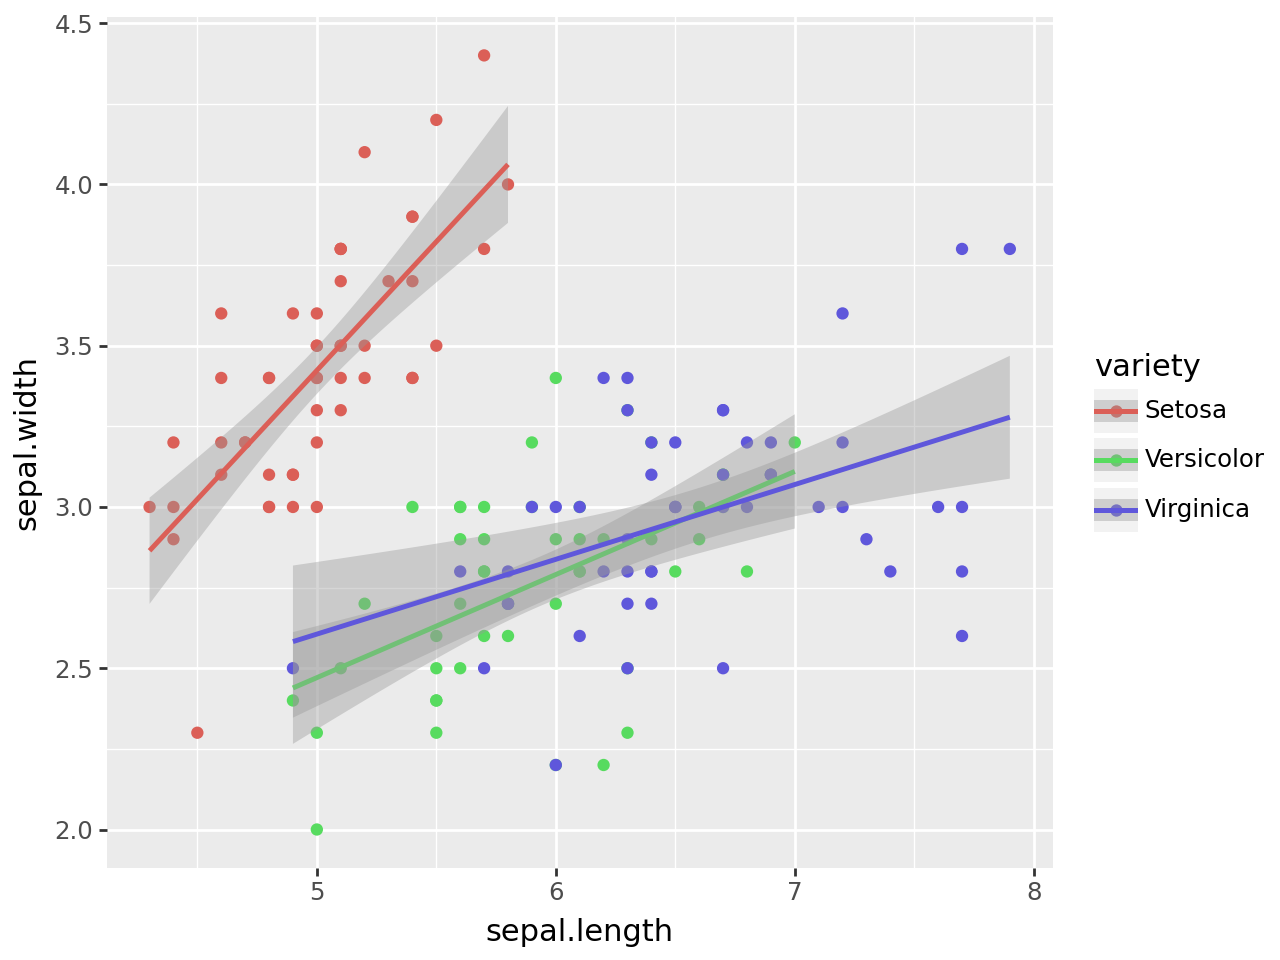

/tmp/ipykernel_2409542/1860689304.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


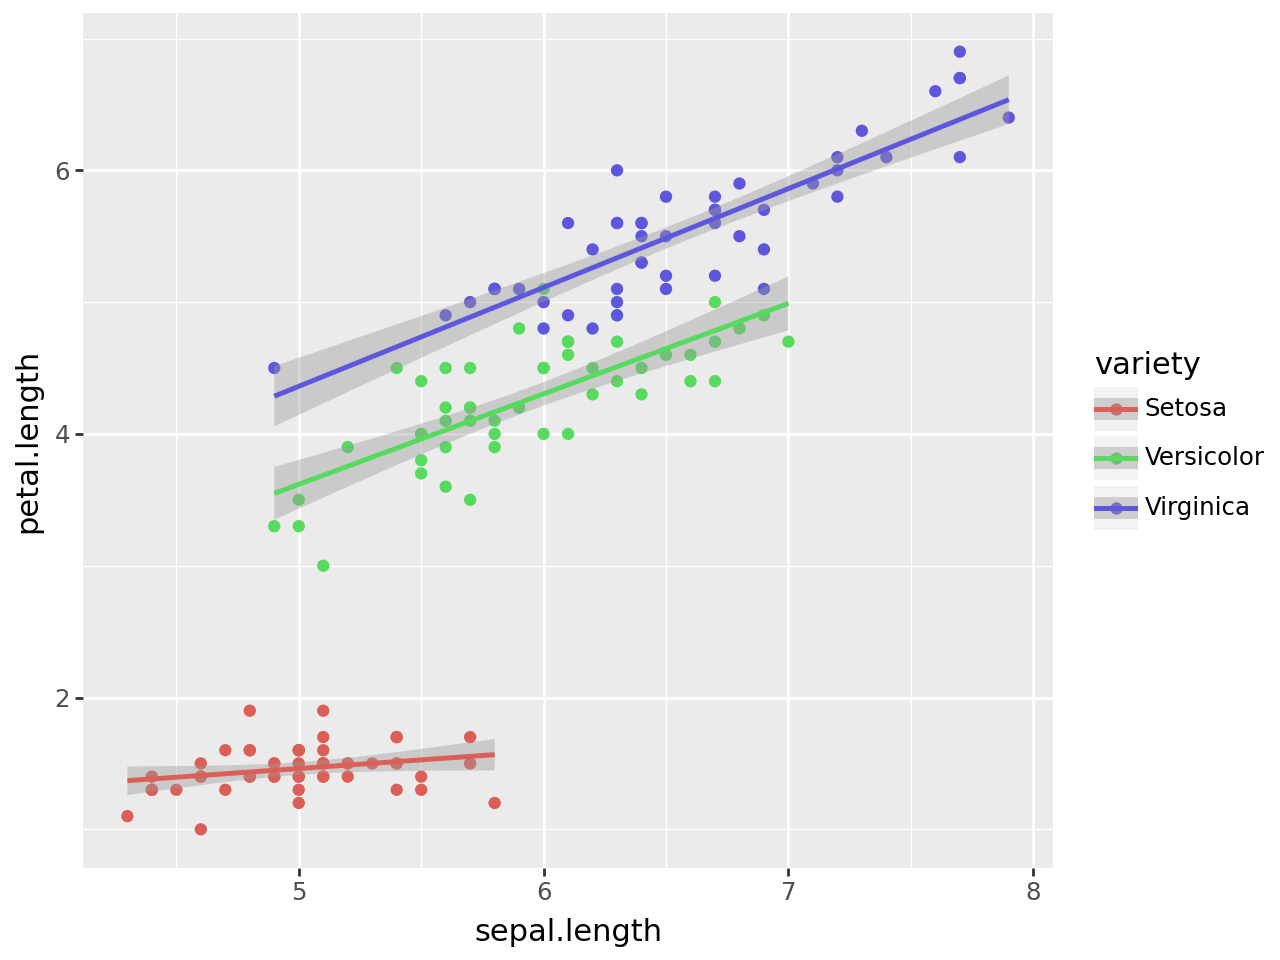

/tmp/ipykernel_2409542/1860689304.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


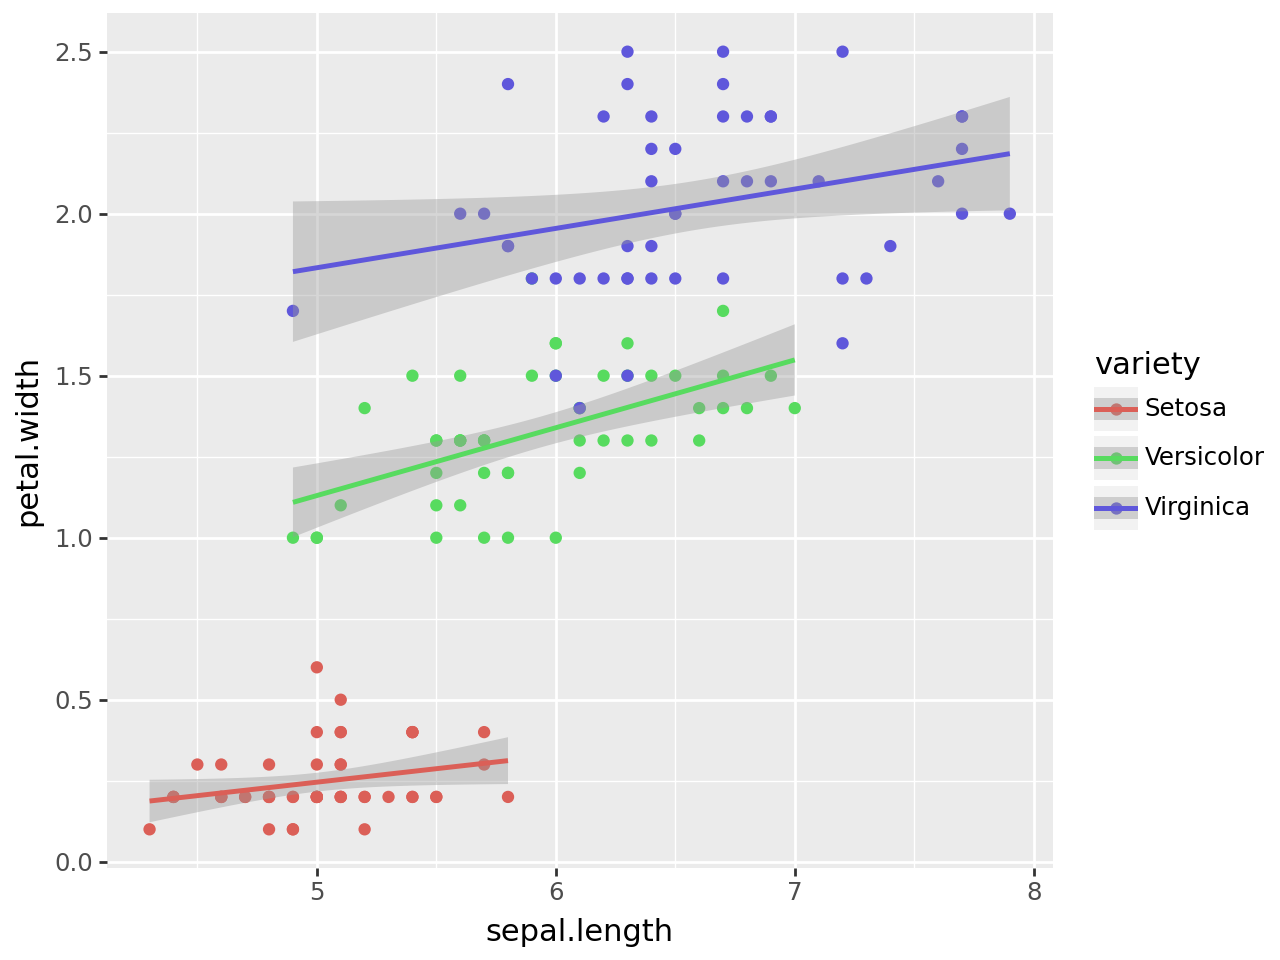

/tmp/ipykernel_2409542/1860689304.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


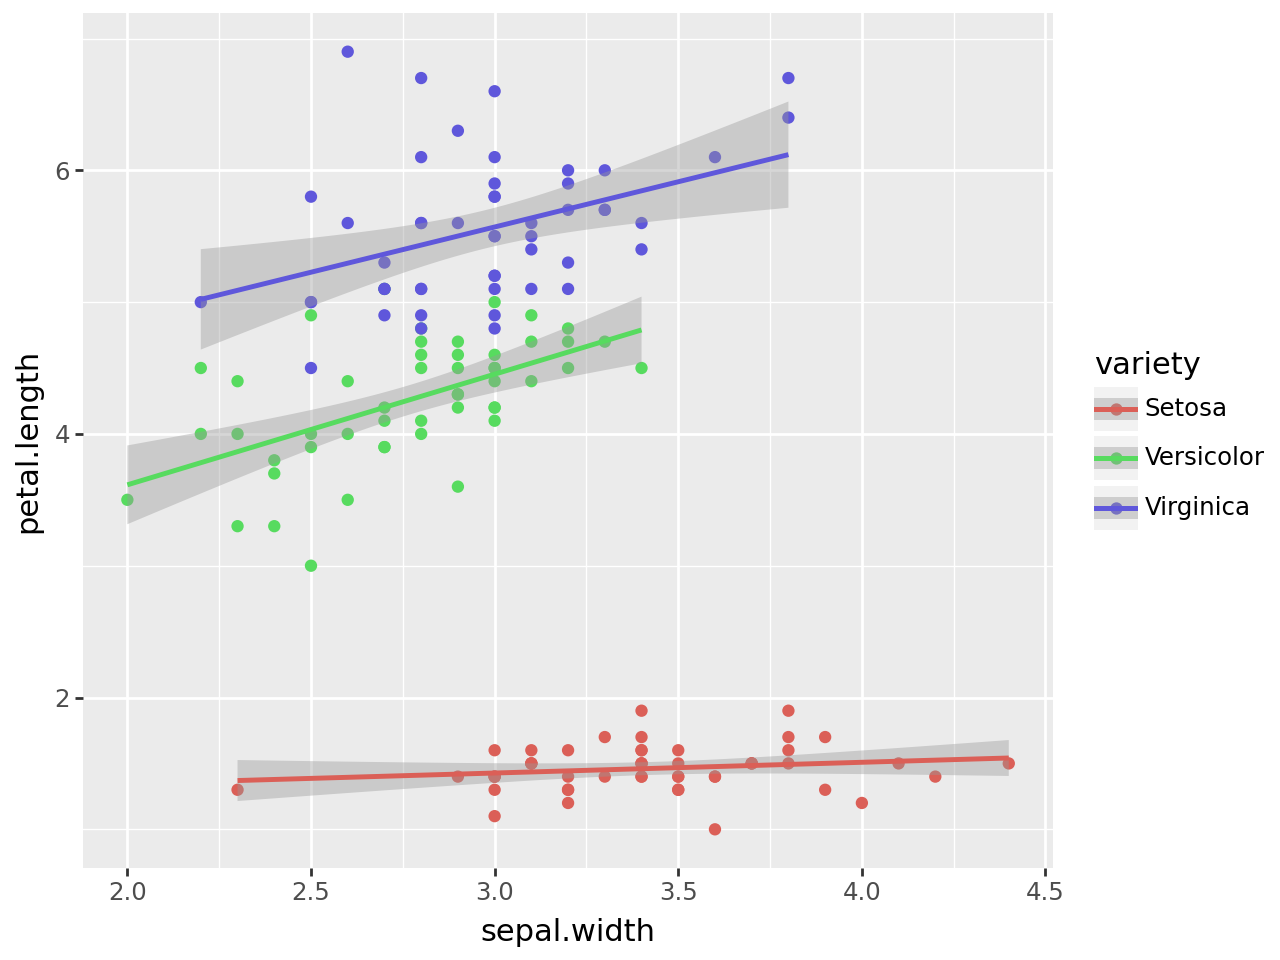

/tmp/ipykernel_2409542/1860689304.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


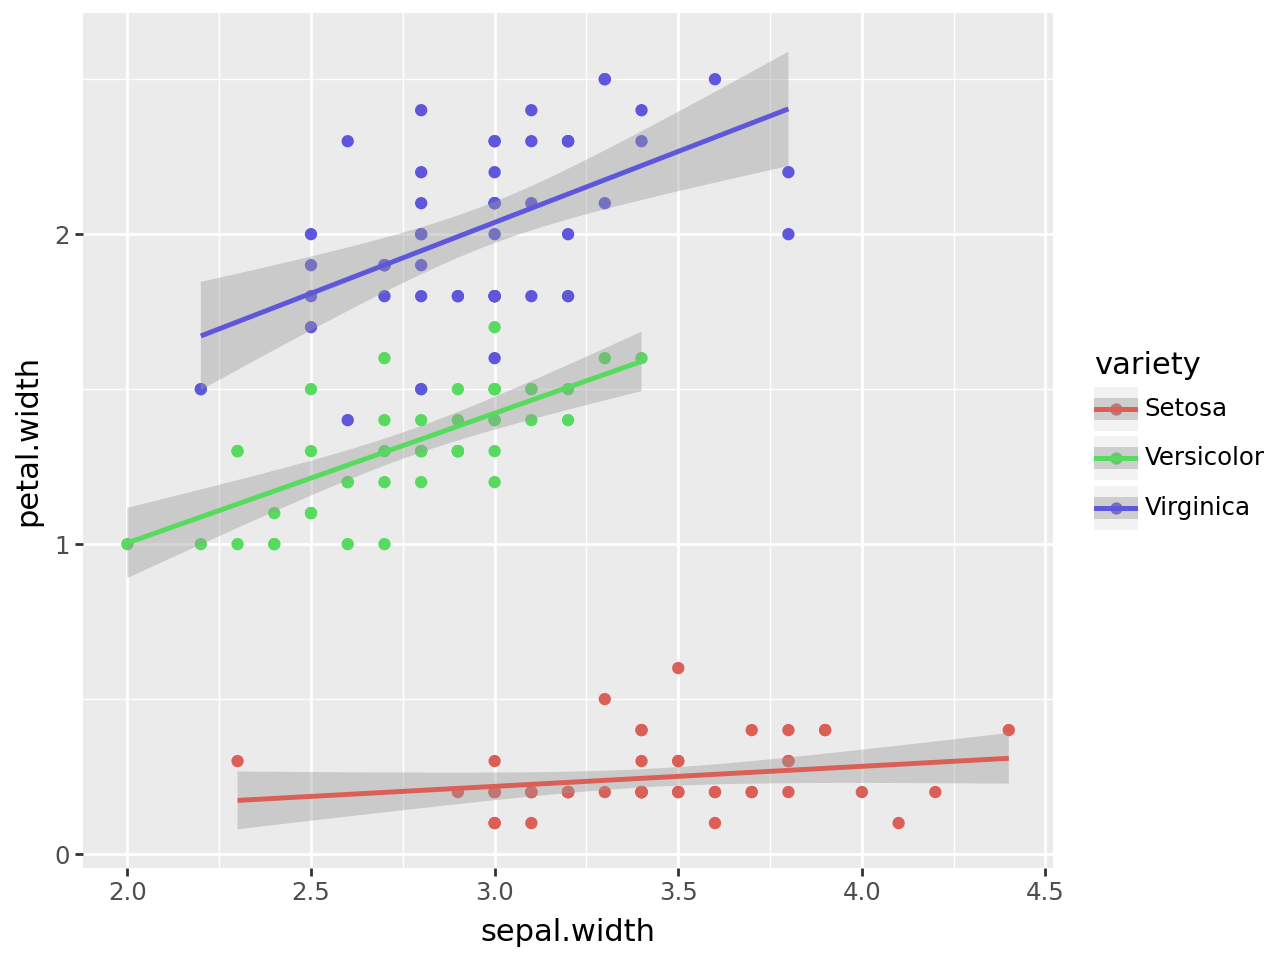

/tmp/ipykernel_2409542/1860689304.py:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


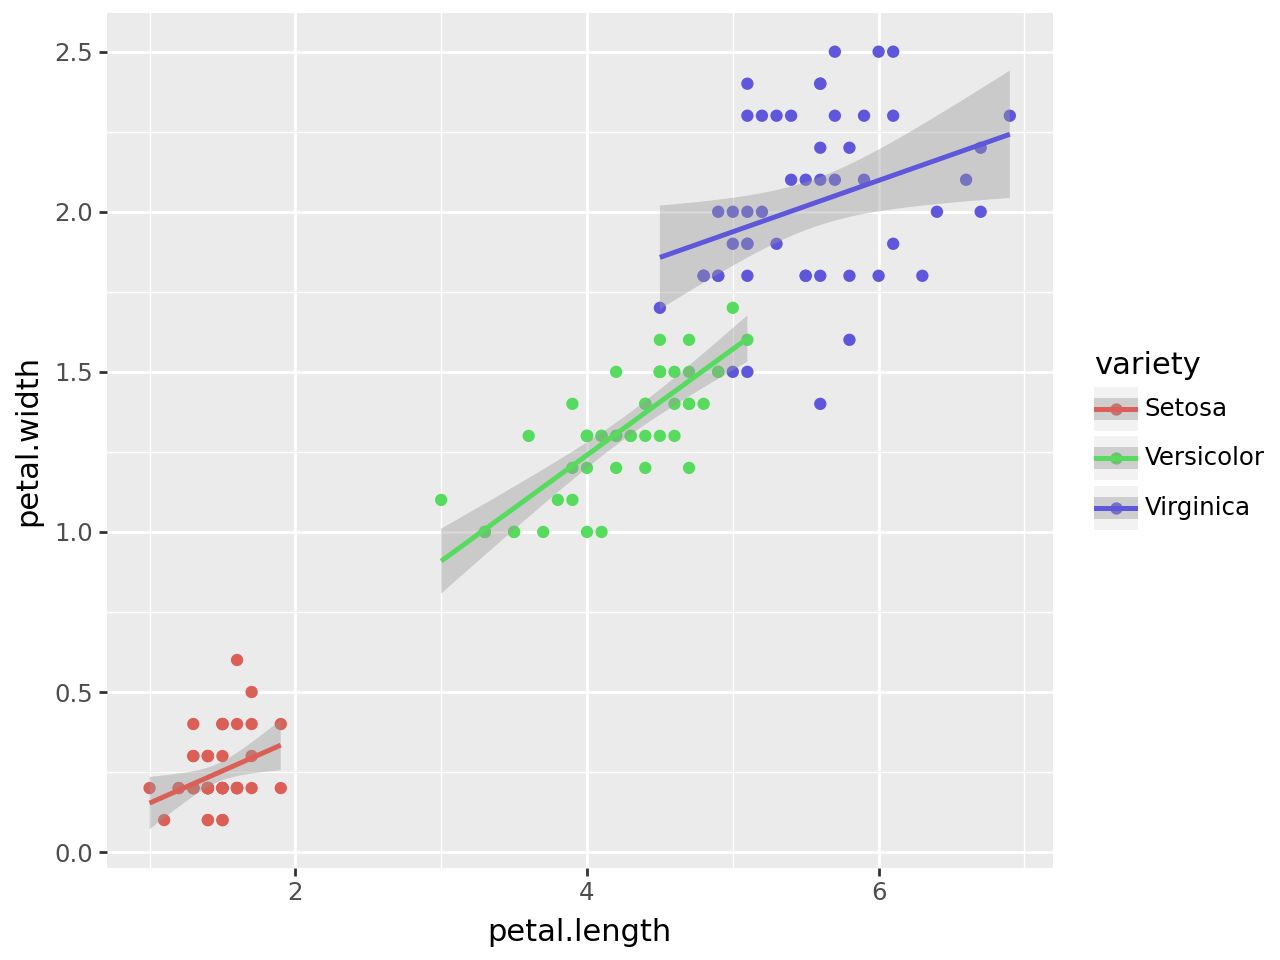

In [30]:
for i in range(0, len(irisraw.columns)-2):
    for j in range(i+1, len(irisraw.columns)-1):
        #print(irisraw.columns[i],irisraw.columns[j])
        print(p9.ggplot(data=irisraw,mapping=p9.aes(x=irisraw.columns[i], y=irisraw.columns[j], color='variety'))+p9.geom_point()+p9.geom_smooth(method='lm'))